# Homework1:Image Classification

檔名請按照命名格式:711xxxxxxx(您的學號)_hw1.ipynb

1.導入MNIST資料集並視覺化5個樣本和對應的Label（10分）

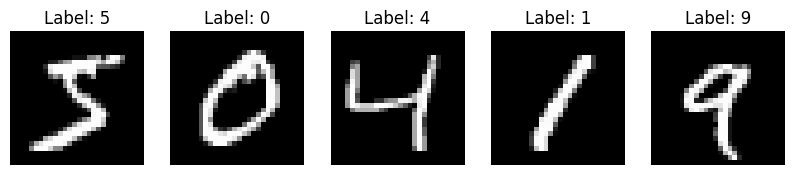

In [2]:
###################################################################################
# 
# 老師、助教您好：
#
# 當您使用 VS Code 批改作業時，如果無法看到程式的輸出結果
# 請將此檔案所在的資料夾加入到 workspace trust 來解決。
# 此問題是 VS Code 的安全機制所導致的，
# 並非程式本身的問題，詳細原因請參考下方連結：
# https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_workspace-trust
# 其他程式編輯器或許也有類似的安全機制，請您留意，謝謝。
#
# Best Regards,
# 蔡詳羿
###################################################################################
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# 導入MNIST資料集
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_origin = x_train.copy()
x_test_origin = x_test.copy()

# 視覺化5個樣本和對應的Label
_, axes = plt.subplots(1, 5, figsize=(10, 10))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.show()

2.資料預處理並把資料劃分成訓練集和測試集（10分）

將數據轉成一維且進行標準化:

In [3]:
# 使用reshape()將數據轉成一維、再除以255做標準化
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

將Label進行one-hot編碼:

In [4]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

# 檢查one-hot encoding的結果
print('One-hot encoding of first 5 training labels:')
print(y_train_one_hot[:5])

One-hot encoding of first 5 training labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


印出訓練集與測試集的shape:

In [5]:
print(f'Training set shape:    {x_train.shape}')
print(f'Training labels shape: {y_train_one_hot.shape}')
print(f'Test set shape:        {x_test.shape}')
print(f'Test labels shape:     {y_test_one_hot.shape}')

Training set shape:    (60000, 784)
Training labels shape: (60000, 10)
Test set shape:        (10000, 784)
Test labels shape:     (10000, 10)


3.構建至少兩層隱藏層的ANN（10分）

建立神經網絡:

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

# 1個輸入層、4個隱藏層、1個輸出層
model = Sequential([
    Input(shape=(28 * 28,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

I0000 00:00:1727254827.627143   58452 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727254827.777122   58452 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727254827.777166   58452 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727254827.780167   58452 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727254827.780206   58452 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

印出模型的架構:

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,074 (211.23 KB)

 Trainable params: 54,074 (211.23 KB)

 Non-trainable params: 0 (0.00 B)

4.完成訓練參數設置和訓練模型(10分）

設置optimizer、loss function、metrics、learning rate(若您選擇的optimizer有預設的learning rate則可以不用):

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

訓練模型:

In [9]:
epochs = 15
batch_size = 512

history = model.fit(x_train,
                    y_train_one_hot,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose = 1,
                    validation_data = (x_test, y_test_one_hot))

Epoch 1/15


I0000 00:00:1727254830.094250   58605 service.cc:146] XLA service 0x7ff7dc004e10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727254830.094284   58605 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-09-25 17:00:30.131871: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-25 17:00:30.294005: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-09-25 17:00:32.652408: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_458', 2168 bytes spill stores, 2168 bytes spill loads



 74/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3746 - loss: 1.8218

I0000 00:00:1727254834.697569   58605 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.4719 - loss: 1.5708 - val_accuracy: 0.9034 - val_loss: 0.3482
Epoch 2/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9118 - loss: 0.3074 - val_accuracy: 0.9337 - val_loss: 0.2264
Epoch 3/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9410 - loss: 0.2047 - val_accuracy: 0.9486 - val_loss: 0.1761
Epoch 4/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9526 - loss: 0.1635 - val_accuracy: 0.9531 - val_loss: 0.1536
Epoch 5/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9593 - loss: 0.1368 - val_accuracy: 0.9574 - val_loss: 0.1402
Epoch 6/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9652 - loss: 0.1180 - val_accuracy: 0.9635 - val_loss: 0.1238
Epoch 7/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9678 - loss: 0.1068 - val_accuracy: 0.9641 - val_loss: 0.1235
Epoch 8/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9740 - loss: 0.0909 - val_accuracy: 0.9659 - va

5.訓練模型並視覺化訓練曲線證明Loss隨著訓練的逐漸下降（20分）

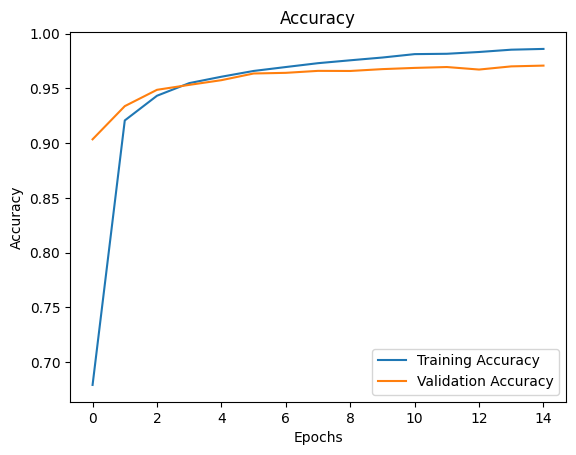

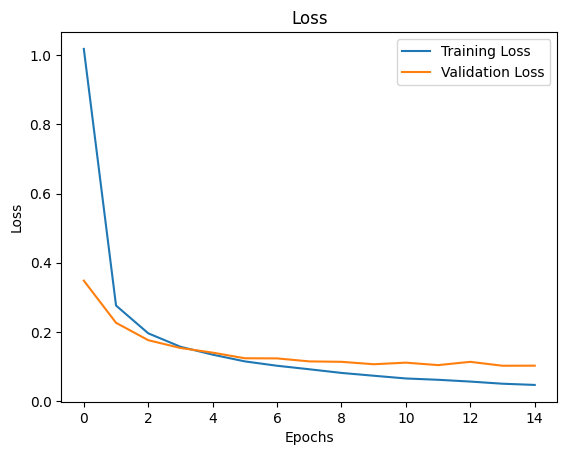

In [10]:
# accuracy 曲線
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# loss 曲線
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

6.印出模型在測試集上的表現,accuracy需達到90%以上（20分）

In [11]:
_, test_acc = model.evaluate(x_test, y_test_one_hot)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9657 - loss: 0.1178
Test accuracy: 97.08%


7.顯示出模型預測測試集的Confusion Matrix、Precision、Recall、Accuracy（10分）

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


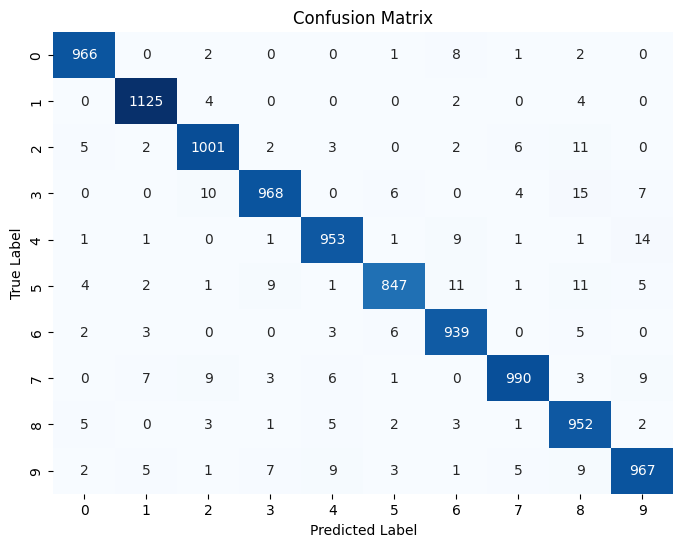

Precision: 97.07%
Recall: 97.04%
Accuracy: 97.08%


In [13]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import seaborn as sns

# 預測測試集
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision* 100:.2f}%")

# Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall* 100:.2f}%")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy* 100:.2f}%")

8.視覺化3個模型預測錯誤的資料（10分）

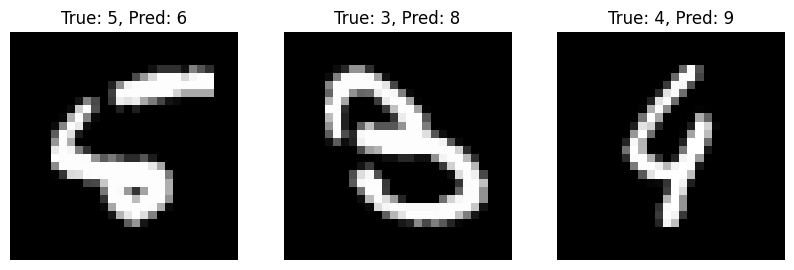

In [14]:
errors = np.where(y_pred != y_test)[0]

_, axes = plt.subplots(1, 3, figsize=(10, 10))
for i, idx in enumerate(errors[:3]):
    axes[i].imshow(x_test_origin[idx], cmap='gray')
    axes[i].set_title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    axes[i].axis('off')
plt.show()